In [1]:
%load_ext autoreload
%autoreload 2

from core.data import *
from core.analysis import *
import yasa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mne.filter import resample, filter_data

sns.set(font_scale=1.2)

In [2]:
x_train_file = 'data/x_train.h5'
y_train_file = 'data/y_train.csv'
x , y = load_x(x_train_file), load_y(y_train_file)

Started loading file data/x_train.h5
Finished loading the file.
Started loading file data/y_train.csv
Finished loading the file.


In [3]:
def format_x(x):
    """
    argument:
        - x : matrix returned by load_x
    """
    x = reorder_nhwc(flatten_x(x)).squeeze()
    N, H, W = x.shape
    return x.reshape((N*H, W))

x_yasa = format_x(x)
y_yasa = flatten_y(y, repeat = 40*7)
y_yasa = categorize_y(y_yasa)

print('Shape of x and y : ', x_yasa.shape, y_yasa.shape)

Shape of x and y :  (264880, 500) (264880,)


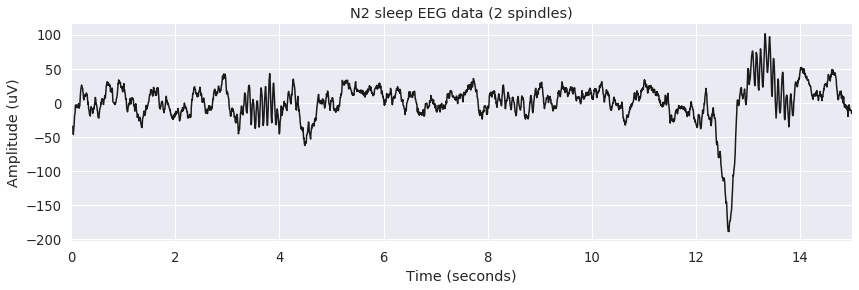

In [4]:
data = np.loadtxt('data/yasa_data.txt')
sf_data = 200.
times = np.arange(len(data)) / sf_data

fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('N2 sleep EEG data (2 spindles)')
sns.despine()

In [5]:
sp = yasa.spindles_detect(data, sf_data)
print(sp)

Start   Peak    End  Duration  Amplitude        RMS  AbsPower  RelPower  \
0   3.32   3.81   4.06      0.74  81.800396  19.650618  2.722480  0.495178   
1  13.26  13.41  13.85      0.59  99.302635  24.495293  2.827413  0.240493   

   Frequency  Oscillations  Symmetry  
0  12.859197          10.0  0.653333  
1  12.158956           7.0  0.250000  


In [12]:
%%capture cap --no-stderr

# compute spindles for every data of x_yasa
def spindle_number(x, sampling_frequency):
    """
    Single channel spindle detection. Returns the number of spindles in the given data
    """
    spindles = yasa.spindles_detect(x, sampling_frequency)
    if spindles is None:
        return 0
    return spindles.shape[0]

sf = 250.

spindle_count = [spindle_number(x_yasa[i], sf) for i in range(1000)]
print(spindle_count)

not downsample if sf is not a mutiple of 100 or 128. Skipping downsampling.
07-Mar-20 23:01:36 | WARNING | No spindles were found in data. Returning None.
07-Mar-20 23:01:36 | WARNING | Cannot downsample if sf is not a mutiple of 100 or 128. Skipping downsampling.
07-Mar-20 23:01:36 | WARNING | No spindles were found in data. Returning None.
07-Mar-20 23:01:36 | WARNING | Cannot downsample if sf is not a mutiple of 100 or 128. Skipping downsampling.
07-Mar-20 23:01:36 | WARNING | No spindles were found in data. Returning None.
07-Mar-20 23:01:36 | WARNING | Cannot downsample if sf is not a mutiple of 100 or 128. Skipping downsampling.
07-Mar-20 23:01:36 | WARNING | No spindles were found in data. Returning None.
07-Mar-20 23:01:36 | WARNING | Cannot downsample if sf is not a mutiple of 100 or 128. Skipping downsampling.
07-Mar-20 23:01:36 | WARNING | No spindles were found in data. Returning None.
07-Mar-20 23:01:36 | WARNING | Cannot downsample if sf is not a mutiple of 100 or 128. Sk

In [13]:
print(spindle_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 